In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv")

tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_count = dict()

for index, tweet in tweets.iteritems():
    # No clue why, but this print statement has to be here or tweet.split() will throw an error
    print(tweet)
    words = nltk.word_tokenize(tweet.lower())
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?
Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ
RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)
RT @jww372: I don't have to guess your religion! #ChristmasAftermath
RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see

https://t.co/HjhPguBK1Y by @alisonrose711
@ModicaGiunta me, too!
RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu
RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu
RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH
One of the ways to remind that #BlackLivesMatter #BlackPressDay
RT @ElPenguinito: #myfarewellwordswould

In [3]:
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

for key, count in sorted_count:
    print(key + " " + str(count))

https 9193
trump 2089
n't 1012
... 907
clinton 873
hillary 810
amp 733
obama 670
http 603
people 529
like 409
new 403
get 368
realdonaldtrump 364
donald 364
one 340
politics 334
news 333
via 309
america 283
president 276
tcot 269
make 256
time 248
would 246
're 241
vote 240
says 237
hillaryclinton 236
know 234
want 229
day 225
pjnet 220
black 217
election 215
see 214
gop 214
think 209
say 206
good 205
never 205
maga 201
need 200
video 199
love 198
midnight 197
media 194
campaign 191
right 187
take 175
blicqer 174
going 172
let 171
world 167
white 166
got 166
life 165
back 164
man 160
first 158
still 156
support 153
//t.… 152
really 151
//… 148
great 148
today 147
could 146
police 145
said 145
country 143
stop 142
cnn 142
every 141
american 141
state 141
'll 138
watch 137
bill 136
//t… 135
isis 134
women 134
real 133
show 133
years 129
god 129
https… 128
debate 127
best 127
always 126
post 126
//t.c… 124
last 124
potus 123
way 122
help 122
live 121
dnc 120
much 118
free 118
muslim 117
c

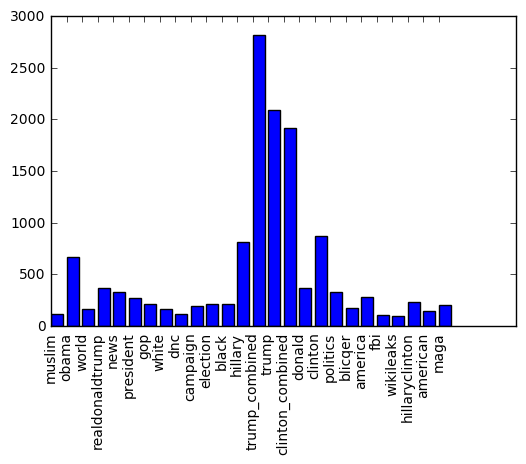

In [4]:
selected = dict(
    trump= filtered_count["trump"],
    clinton= filtered_count["clinton"],
    hillary= filtered_count["hillary"],
    obama= filtered_count["obama"],
    realdonaldtrump= filtered_count["realdonaldtrump"],
    donald= filtered_count["donald"],
    politics= filtered_count["politics"],
    news= filtered_count["news"],
    america= filtered_count["america"],
    president= filtered_count["president"],
    hillaryclinton= filtered_count["hillaryclinton"],
    black= filtered_count["black"],
    election= filtered_count["election"],
    gop= filtered_count["gop"],
    maga= filtered_count["maga"],
    campaign= filtered_count["campaign"],
    blicqer= filtered_count["blicqer"],
    world= filtered_count["world"],
    white= filtered_count["white"],
    american= filtered_count["american"],
    dnc= filtered_count["dnc"],
    muslim= filtered_count["muslim"],
    fbi= filtered_count["fbi"],
    wikileaks= filtered_count["wikileaks"],
    clinton_combined=filtered_count["hillary"] + filtered_count["clinton"] + filtered_count["hillaryclinton"],
    trump_combined = filtered_count["trump"] + filtered_count["realdonaldtrump"] + filtered_count["donald"]
)

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

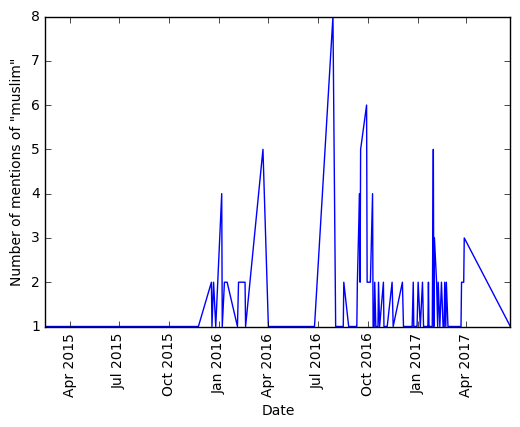

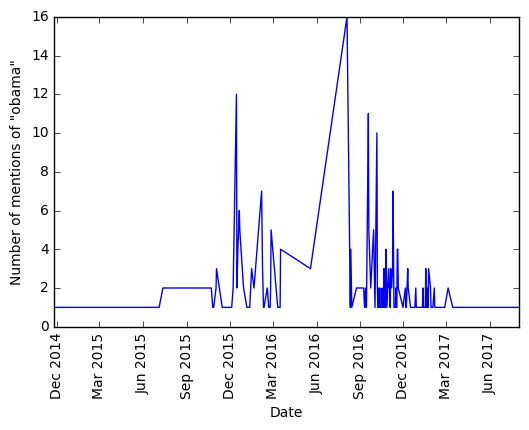

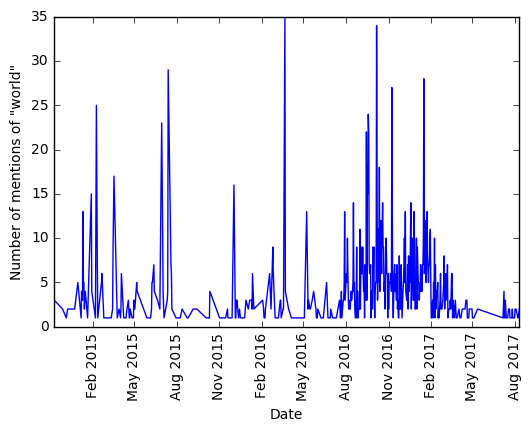

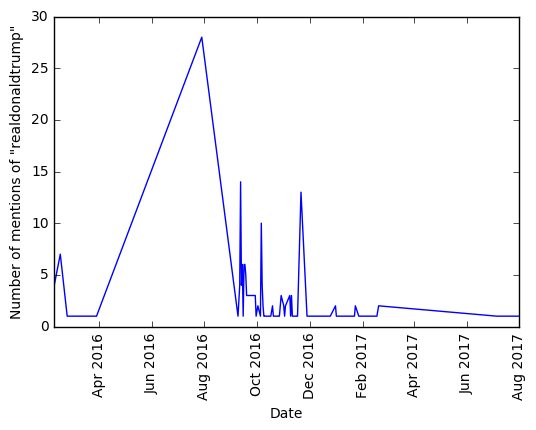

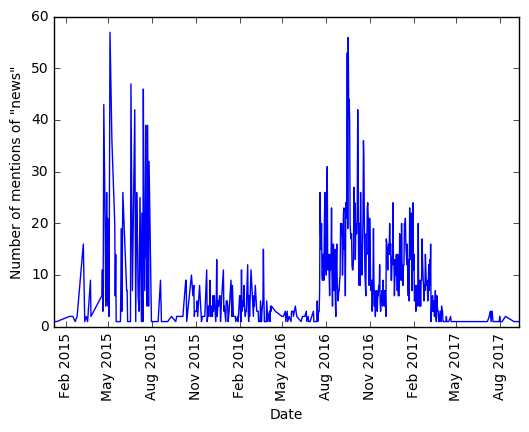

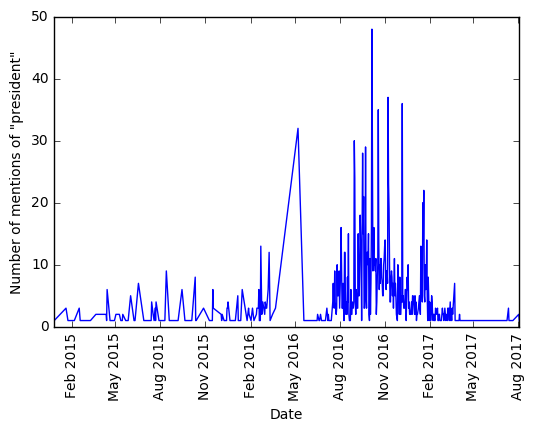

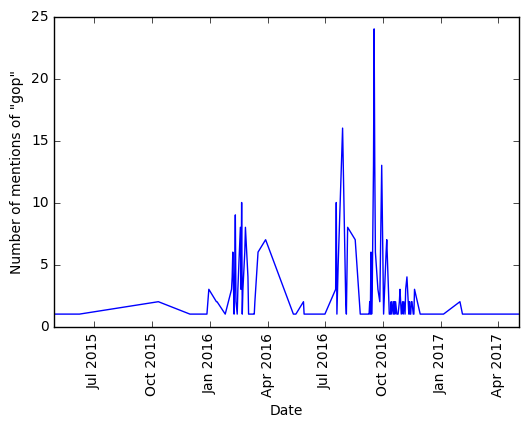

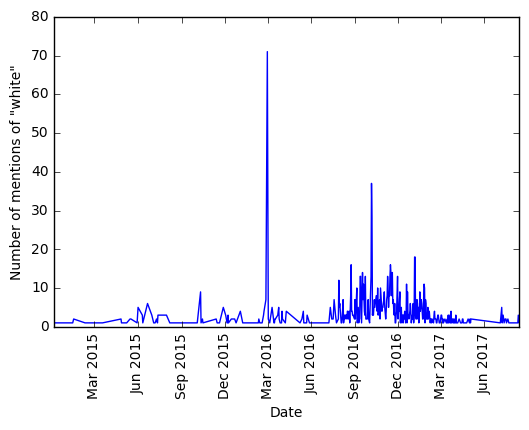

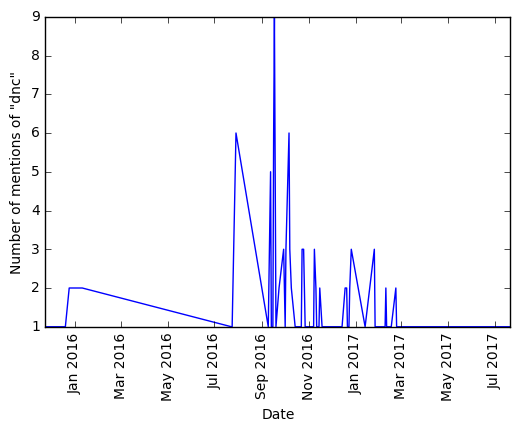

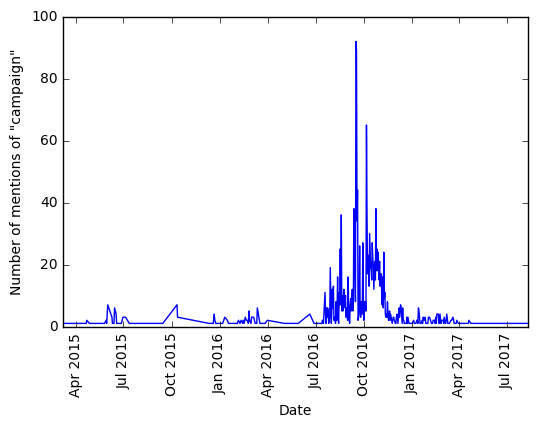

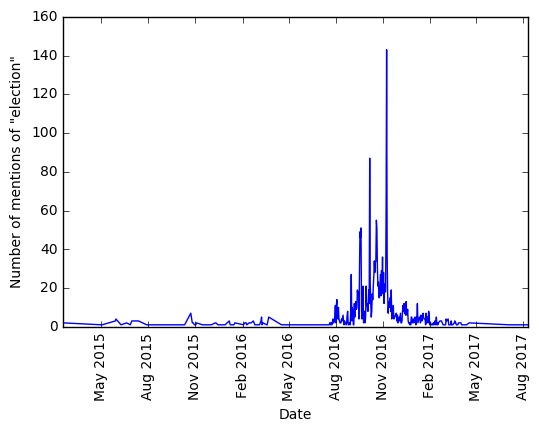

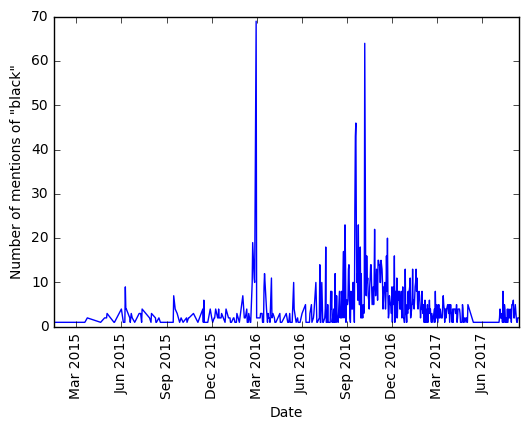

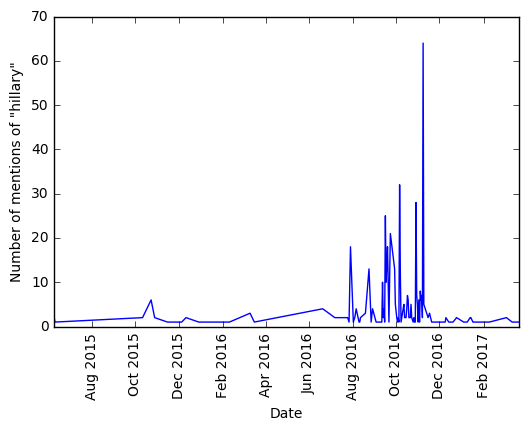

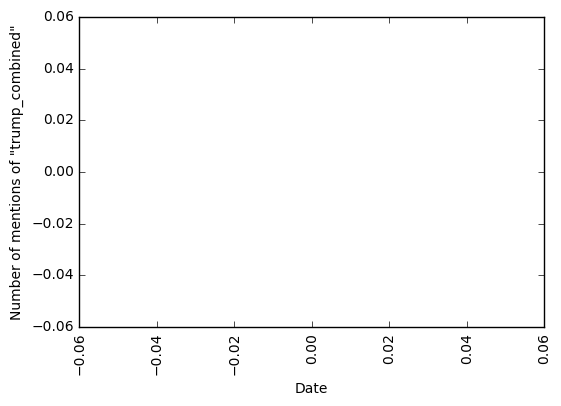

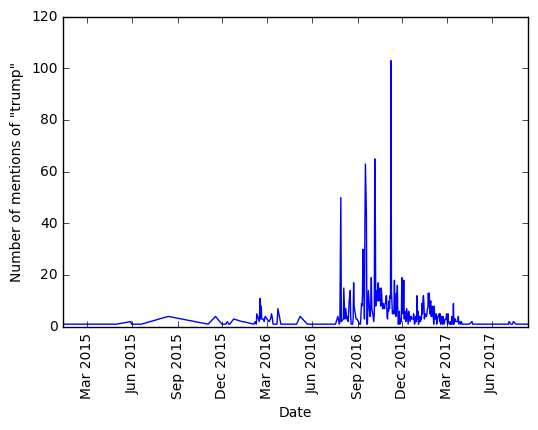

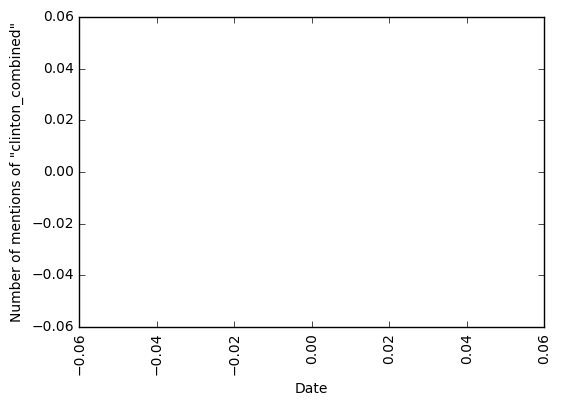

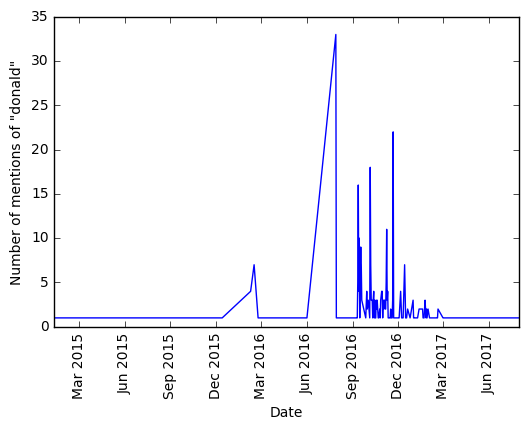

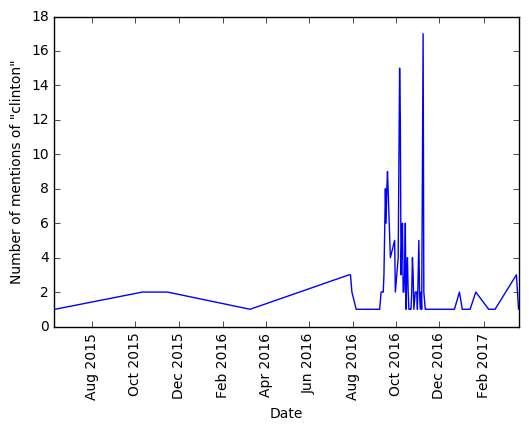

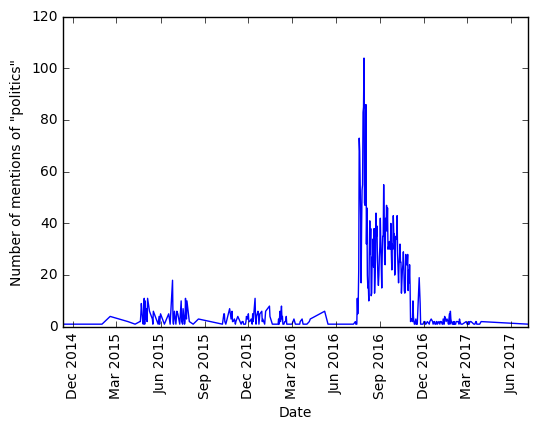

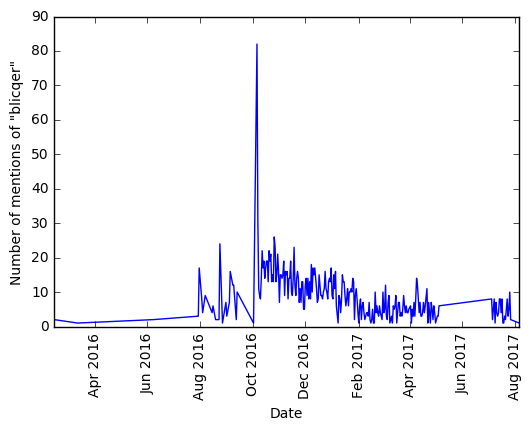

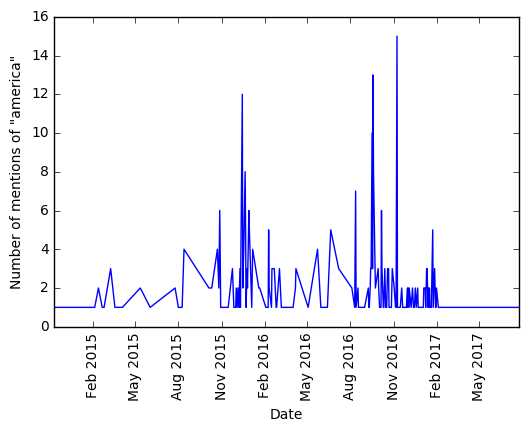

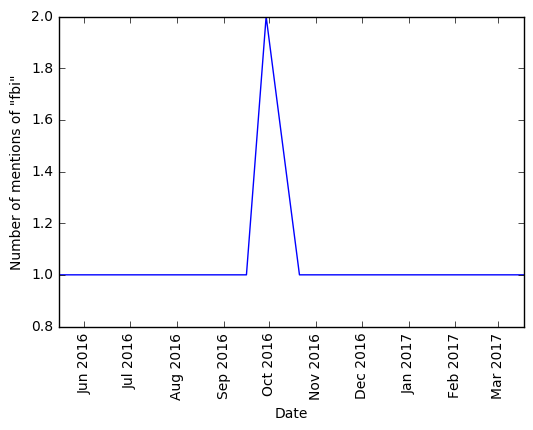

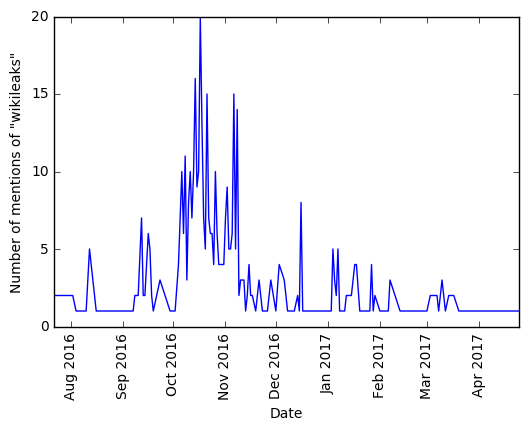

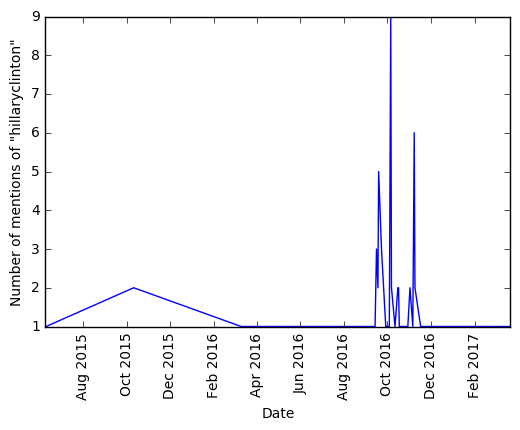

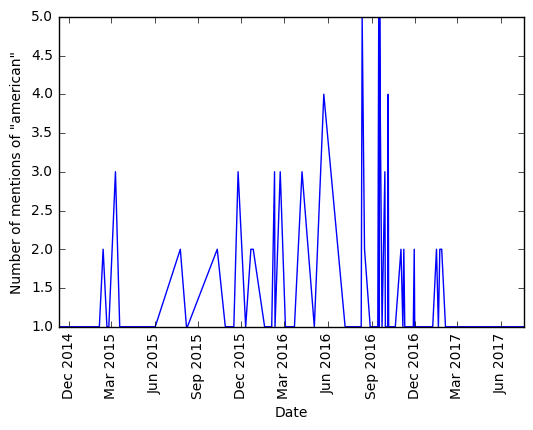

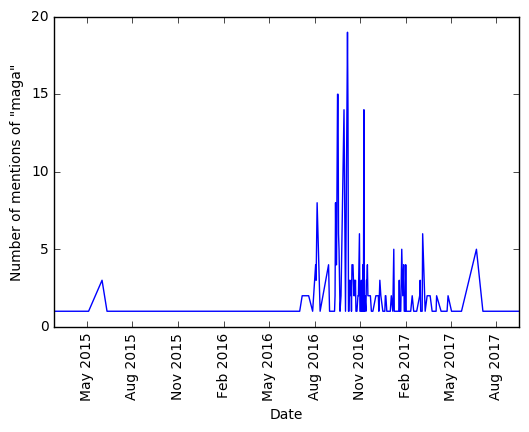

In [5]:
import datetime

def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 1
        
    orderDateCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderDateCount

def PlotMentions(dates, word):
    x_val = [x[0] for x in dates]
    y_val = [x[1] for x in dates]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

Mean: 0.0426941942312 variance: 0.097706573742


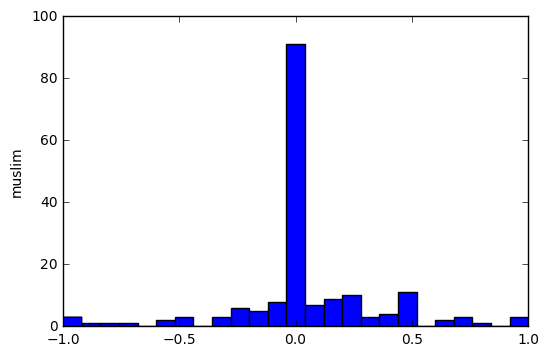

Mean: -0.00393458685328 variance: 0.0817188090441


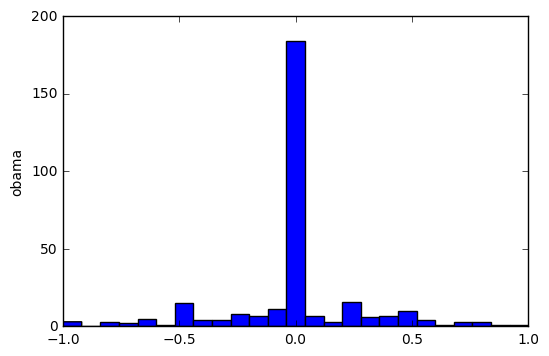

Mean: 0.0640483064672 variance: 0.0965376315034


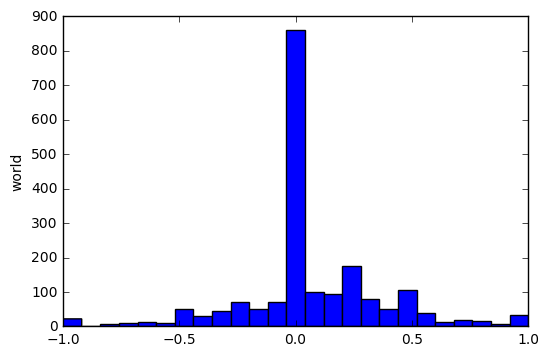

Mean: -0.00306075768032 variance: 0.0408966973721


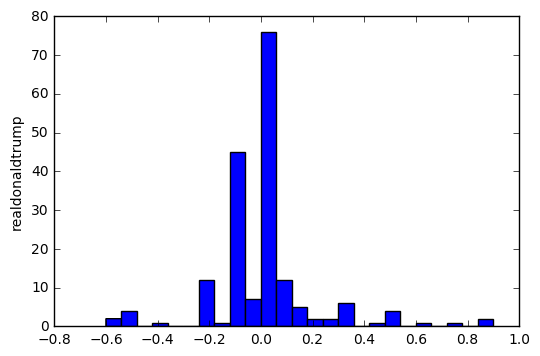

Mean: 0.0273249941977 variance: 0.0762494128439


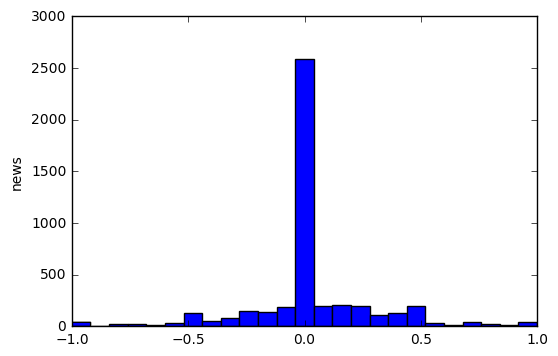

Mean: 0.0699463082432 variance: 0.0891141121521


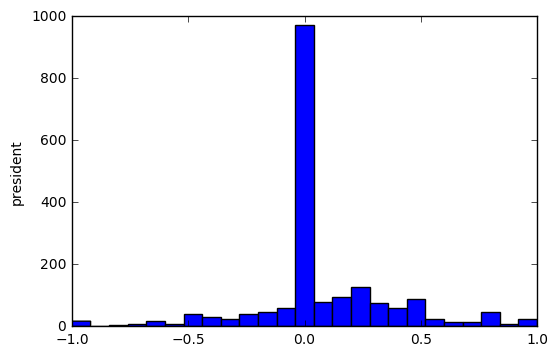

Mean: 0.00423971122941 variance: 0.0580907909018


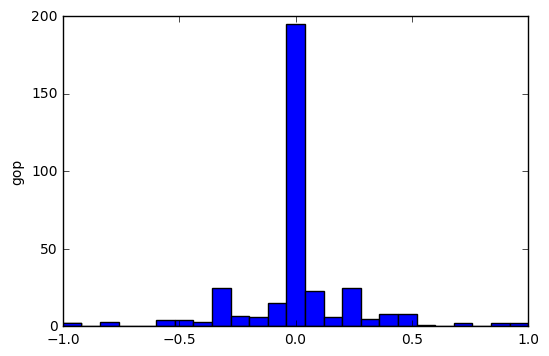

Mean: 0.0256641888567 variance: 0.0326241011702


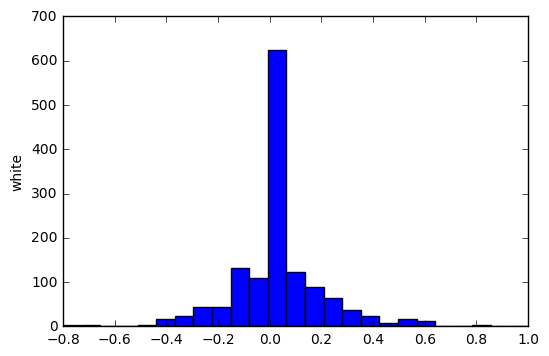

Mean: 0.061561255923 variance: 0.0814761911653


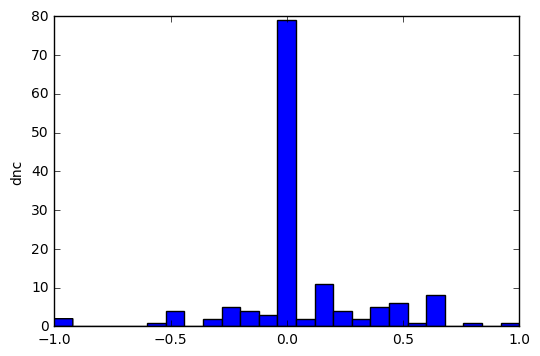

Mean: 0.0338086491773 variance: 0.0594018012741


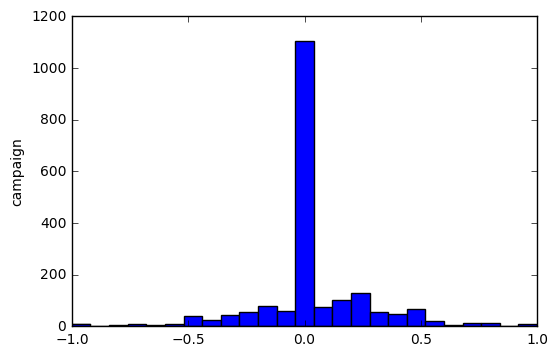

Mean: 0.0541610127221 variance: 0.0828773189392


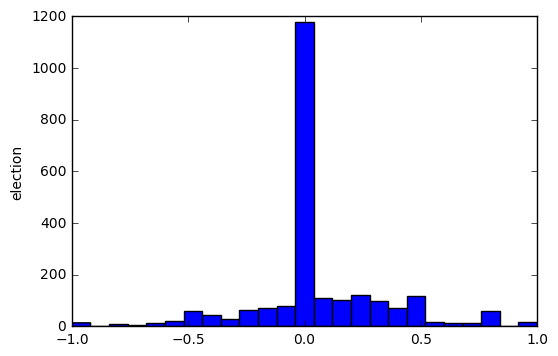

Mean: -0.0252278143633 variance: 0.0527790555829


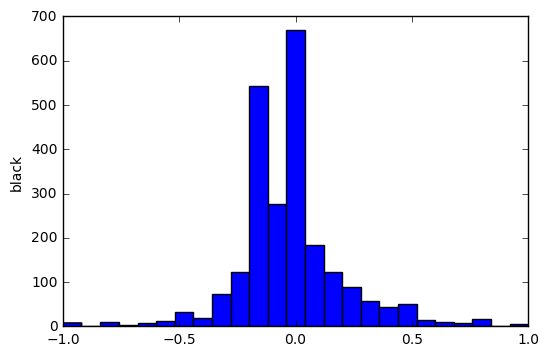

Mean: -0.00510796368483 variance: 0.0614424062715


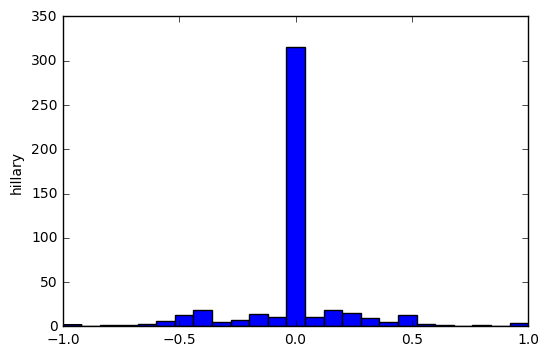

Mean: 0.0335026160767 variance: 0.0877670369665


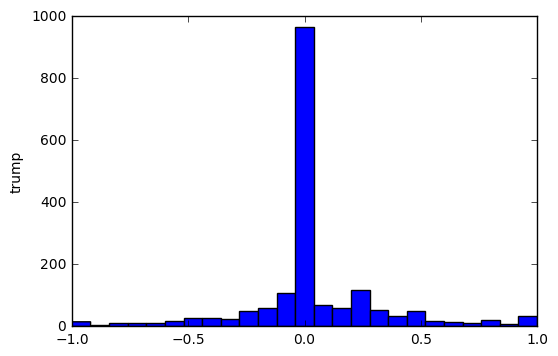

Mean: -0.0137801291459 variance: 0.0653155661408


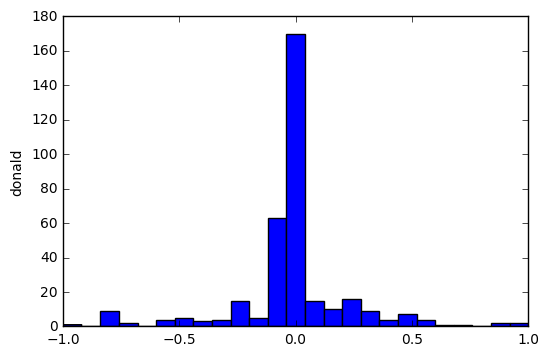

Mean: -0.00430743407225 variance: 0.0762407419994


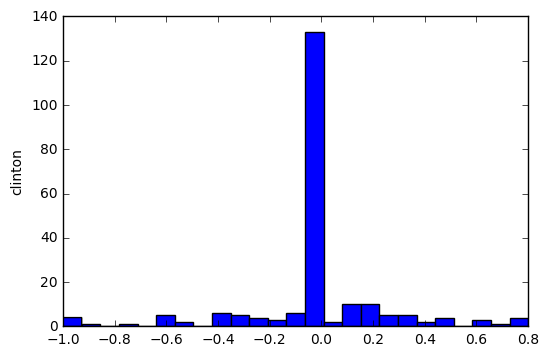

Mean: 0.0327178046622 variance: 0.05618439937


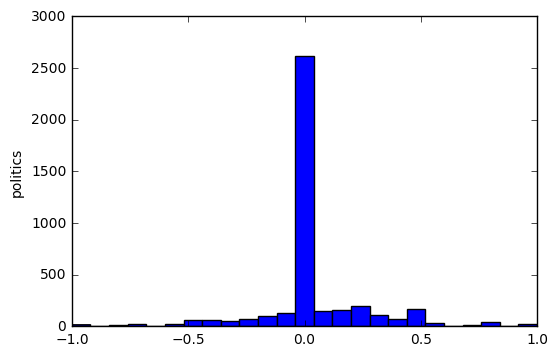

Mean: 0.0430869274755 variance: 0.0658159947335


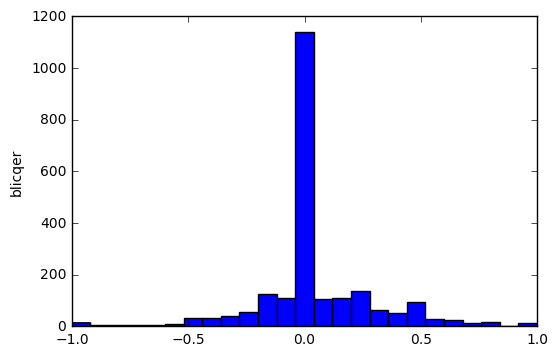

Mean: 0.0473541489554 variance: 0.083189292823


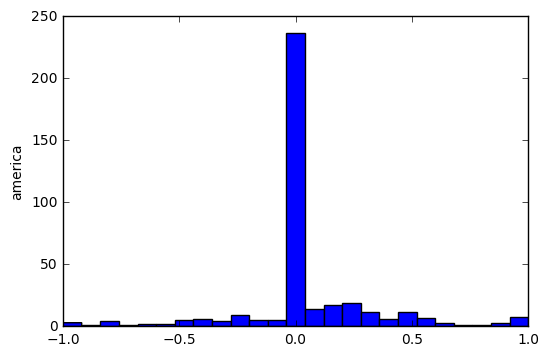

Mean: 0.024358974359 variance: 0.00712031558185


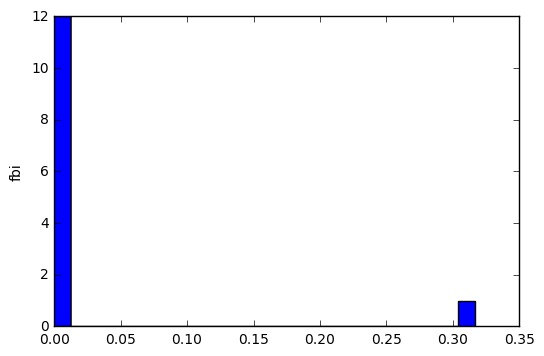

Mean: 0.0309785592006 variance: 0.0619977986722


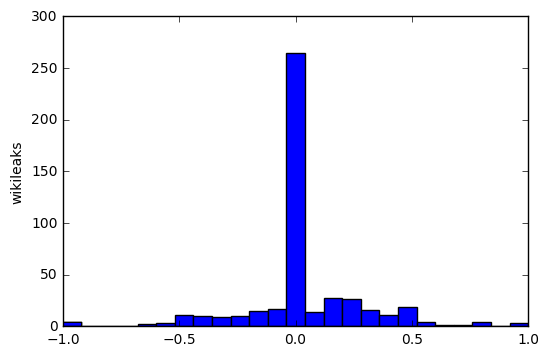

Mean: -0.0115722315319 variance: 0.0554123791287


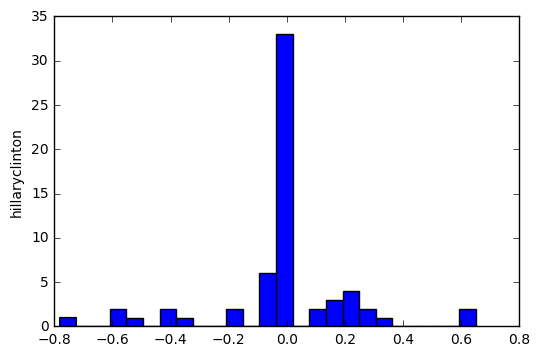

Mean: 0.0621108613609 variance: 0.0899583875841


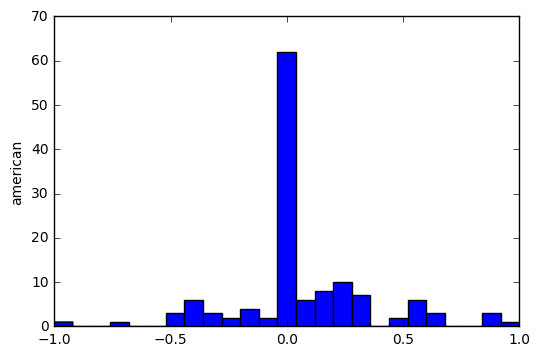

Mean: 0.0225372009928 variance: 0.0716883625495


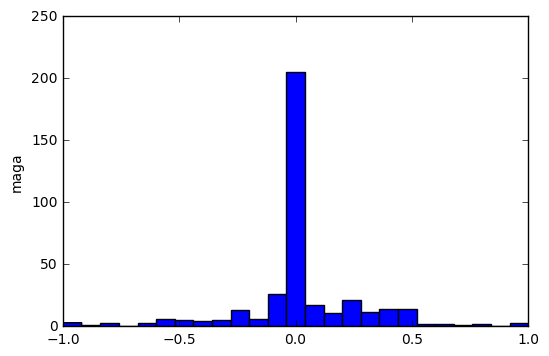

In [6]:
from textblob import TextBlob

# Taken from https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
#def clean_tweet(tweet):
#        '''
#        Utility function to clean tweet text by removing links, special characters
#        using simple regex statements.
#        '''
#        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
                               
def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        print("Mean: " + str(np.mean(sent)) + " variance: " + str(np.var(sent)))
        plt.hist(sent, bins=25)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentiment(word)

Mean: 0.0341492226152 variance: 0.0754060623593


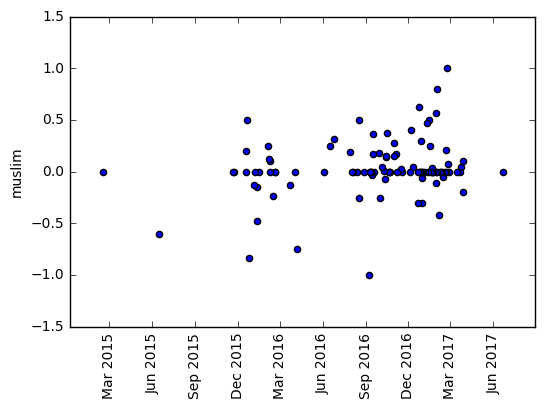

Mean: -0.00706889063017 variance: 0.0769872590612


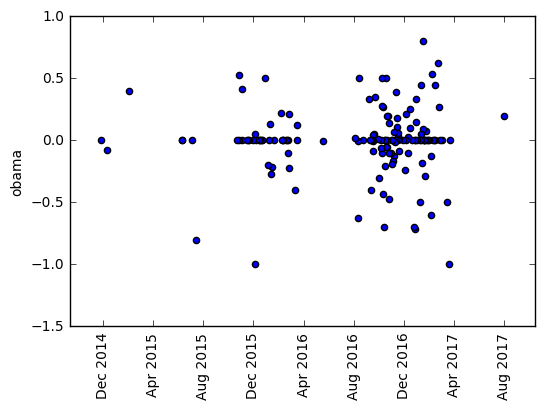

Mean: 0.0730246647017 variance: 0.0474151046651


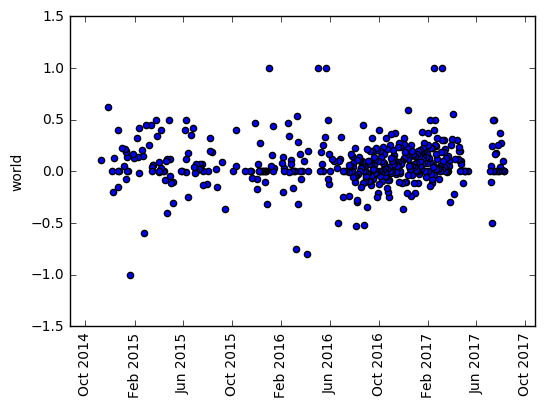

Mean: 0.0200577456766 variance: 0.0394575276338


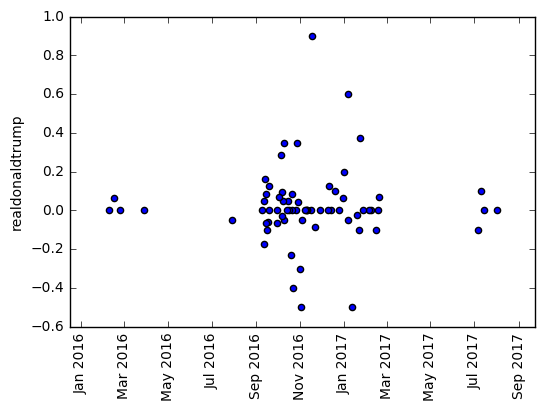

Mean: 0.038097084243 variance: 0.041598529188


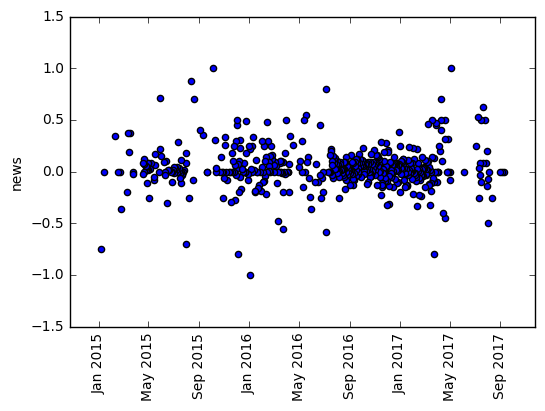

Mean: 0.0473197878457 variance: 0.0548186268457


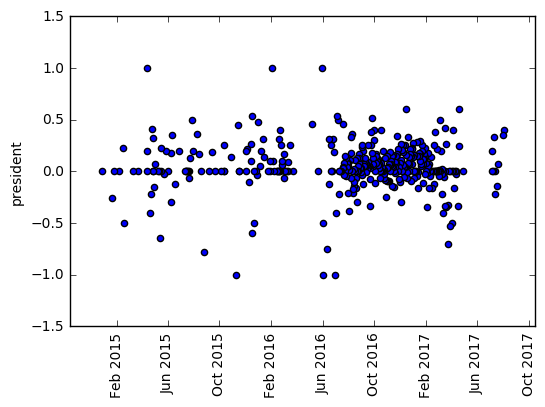

Mean: 0.00603378437686 variance: 0.0407259297686


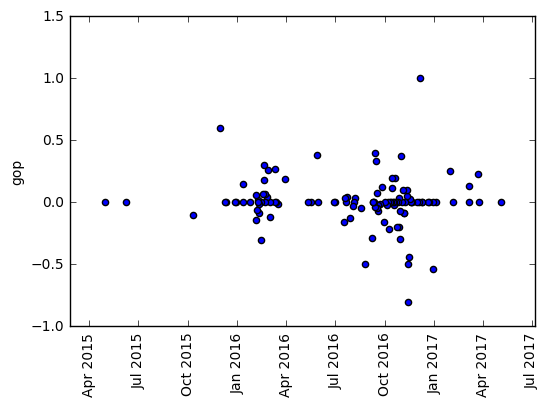

Mean: 0.0193238478927 variance: 0.0181961896491


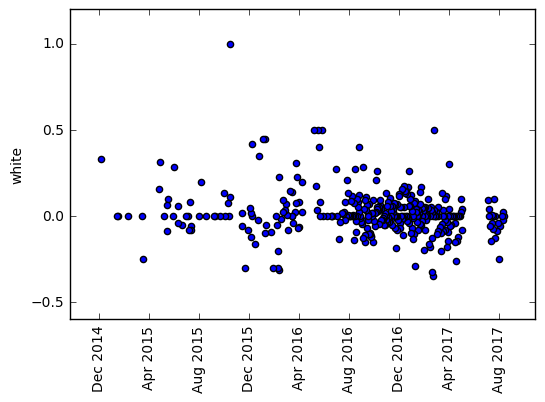

Mean: 0.0593923996058 variance: 0.0839656603836


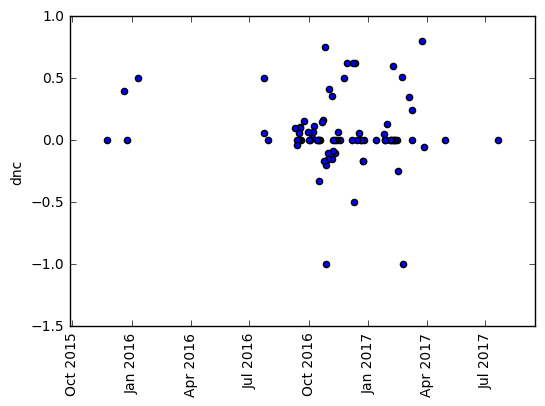

Mean: 0.0512878884615 variance: 0.0228364188828


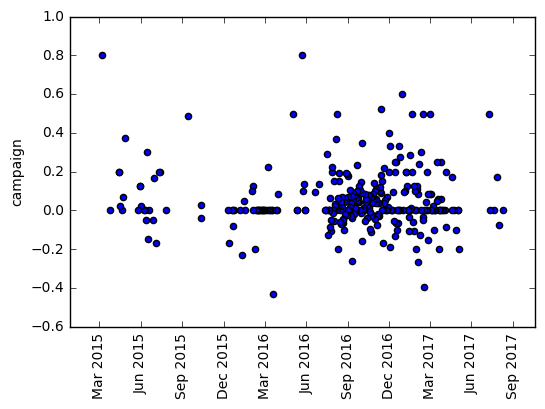

Mean: 0.0643496535581 variance: 0.0463189467511


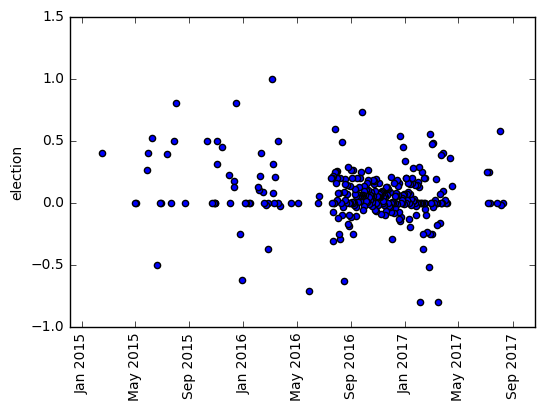

Mean: -0.0147965831446 variance: 0.023590536738


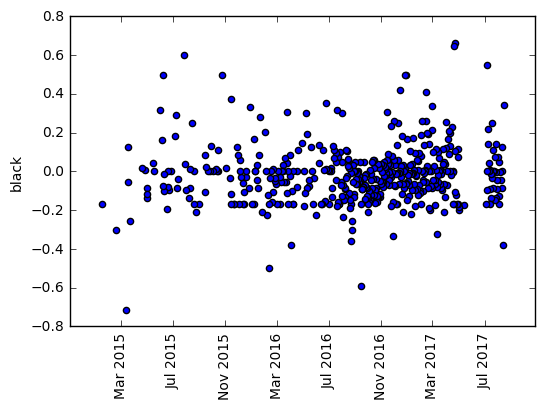

Mean: 0.0169856183652 variance: 0.0324788587174


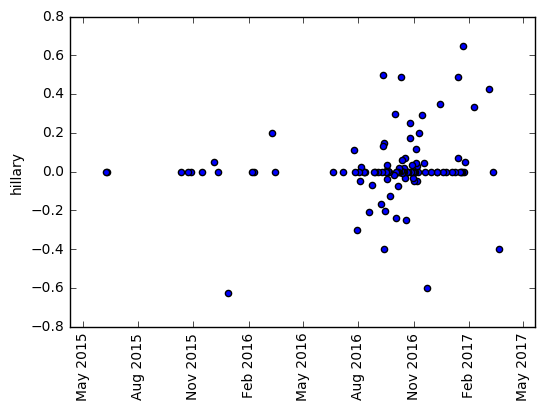

Mean: 0.0297256137082 variance: 0.0410653787303


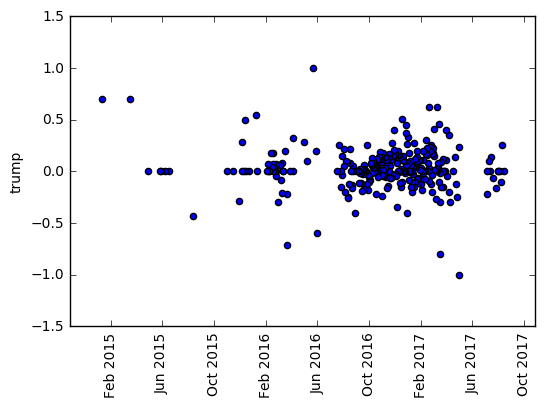

Mean: 0.0157657216343 variance: 0.0558216207279


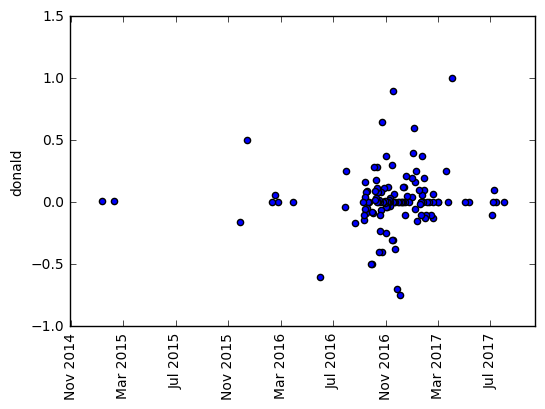

Mean: -0.00178438260604 variance: 0.0412891512745


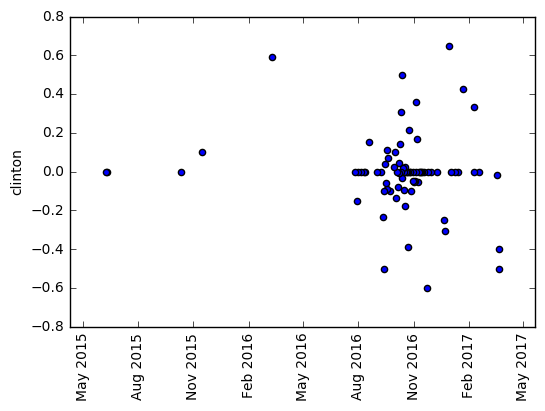

Mean: 0.0355979823927 variance: 0.0377950871743


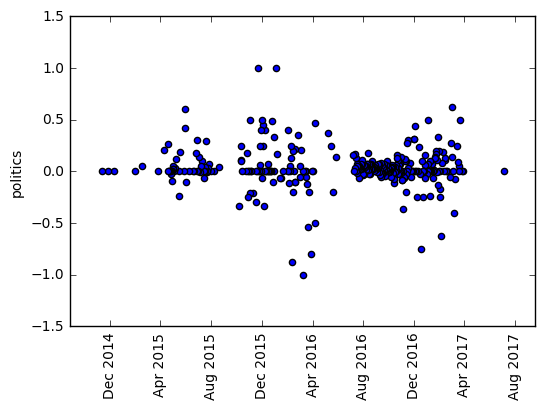

Mean: 0.0392989481789 variance: 0.0144933156846


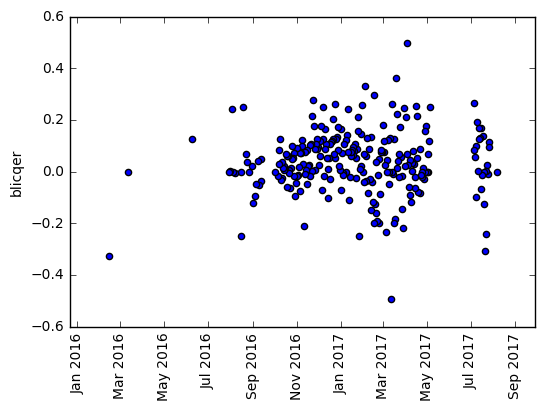

Mean: 0.0392896217823 variance: 0.0745464528508


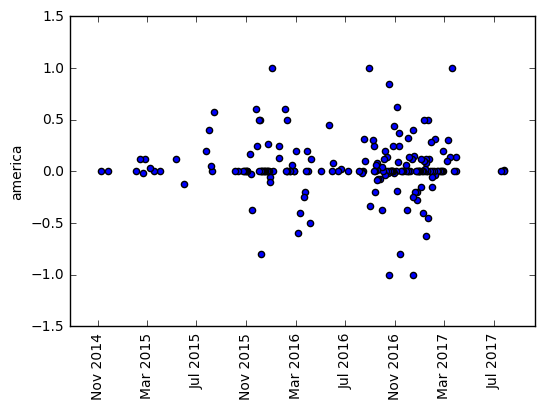

Mean: 0.0263888888889 variance: 0.00766010802469


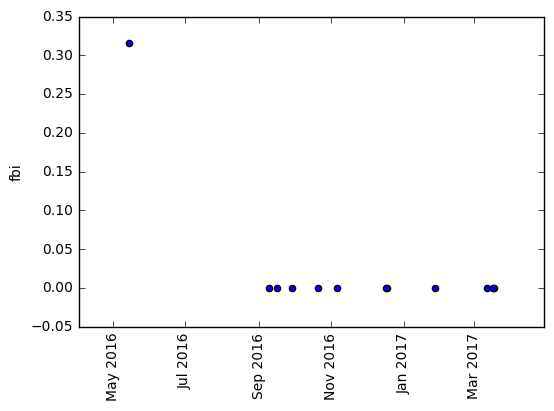

Mean: 0.0104141562386 variance: 0.0425025404091


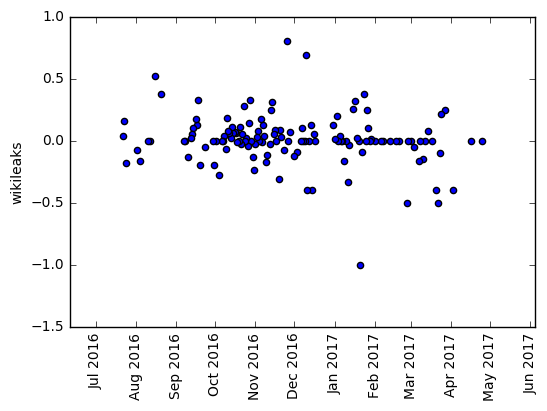

Mean: 0.0241461887785 variance: 0.0510339984635


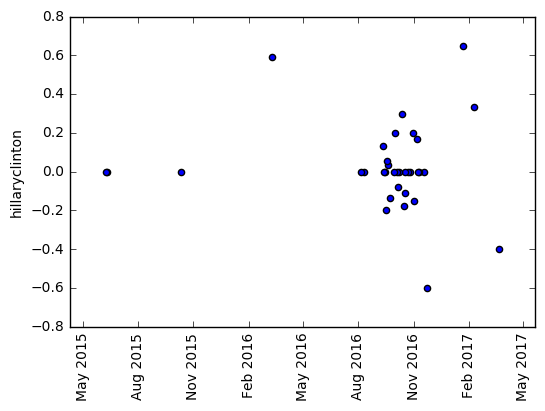

Mean: 0.051532764621 variance: 0.0816988436371


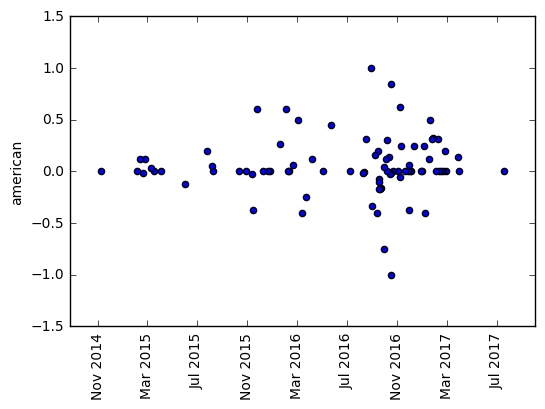

Mean: 0.0369878751621 variance: 0.0549968496103


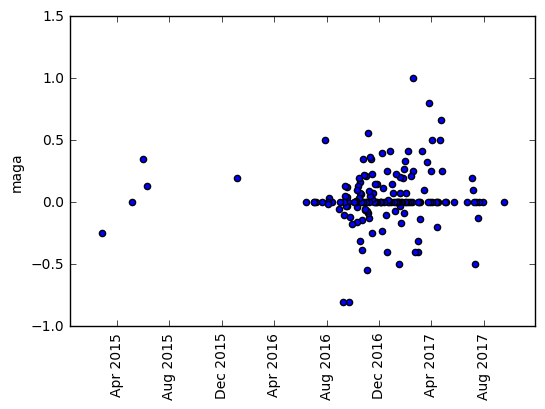

In [25]:
from statsmodels.regression.linear_models import OLS
# TODO: Fit a line to each plot to look for trends over time and plot residuals to make sure the model is valid

def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] ==(date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=True)
    
    if (len(sent) != 0):
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentimentWithTime(word)